In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline


In [2]:
data = pd.read_csv(r"C:\Users\17807\Downloads\Sanjam Code\Volumetric_features.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB


In [4]:
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [5]:
data.shape

(4226, 141)

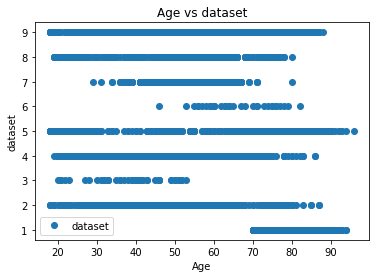

In [6]:
data.plot(x='Age', y='dataset', style='o')  
plt.title('Age vs dataset')  
plt.xlabel('Age')  
plt.ylabel('dataset')  
plt.show()

C:\Users\17807\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

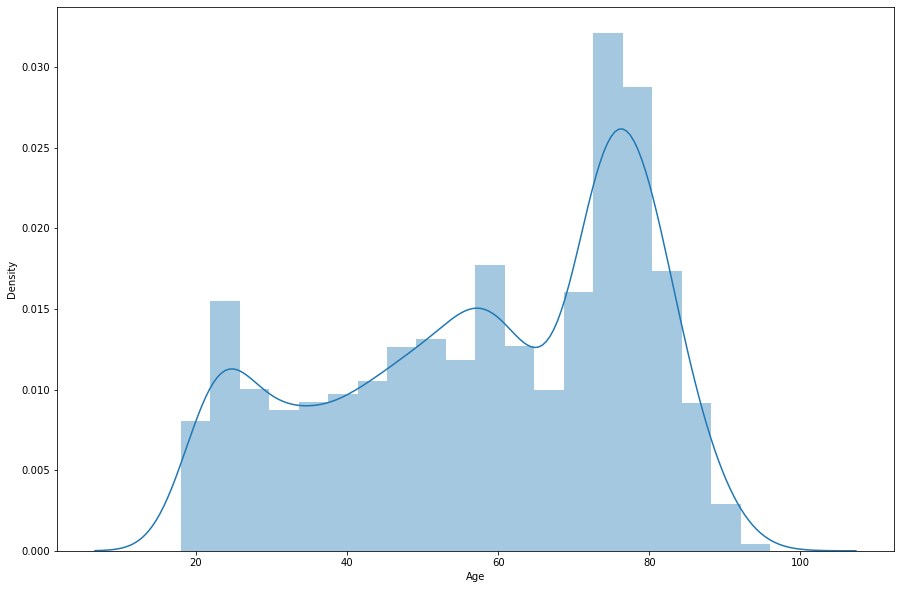

In [7]:
import seaborn as seabornInstance
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Age'])

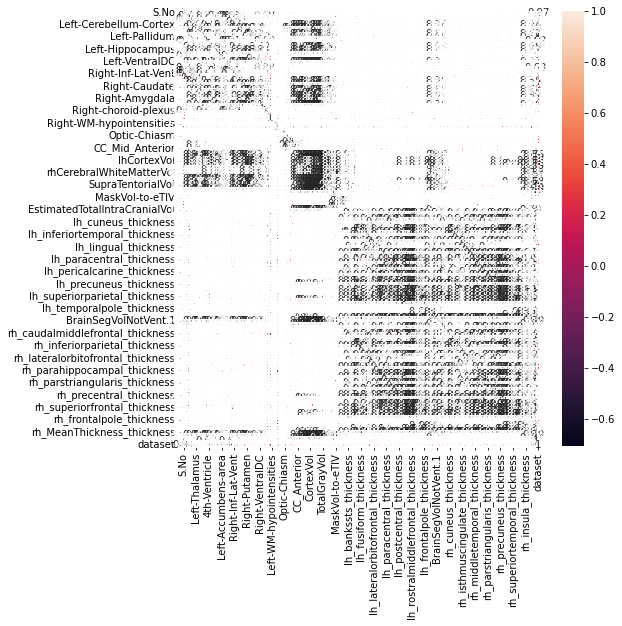

In [8]:
import seaborn as sns  # Imorting Seaborn library
fig, axes = plt.subplots(figsize=(8, 8)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

In [9]:
X = data.drop(["Age"], axis=1) 
y = data.Age.values

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#Linear regression model 

from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=True)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression()

In [11]:
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [12]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Multiple Linear Regression Model:  0.8646631808550757
Testing Accuracy for Multiple Linear Regression Model:  0.8493346122945659
RMSE for Training Data:  7.387829827308521
RMSE for Testing Data:  7.764475585768876


In [13]:
multiple_linear_reg.coef_

array([ 2.20471883e-04, -7.24608727e-03, -5.04896045e-03, -4.68905905e-05,
       -5.60070225e-04, -7.45996414e-03, -5.38685654e-03, -6.85525626e-03,
       -1.75800244e-03, -4.09441749e-03, -8.83805403e-03,  2.29284634e-03,
       -4.86682674e-03, -9.81117040e-03, -7.39831624e-03, -1.33459462e-02,
       -6.98908079e-03,  2.53634770e-02, -3.61625237e-03, -7.33627577e-03,
       -8.00392882e-03, -2.56138679e-04, -3.23226047e-04, -7.78239610e-03,
       -4.80642996e-03, -7.07314170e-03, -6.15829453e-03, -5.28852666e-03,
        3.38684184e-05, -7.19717294e-03, -1.09716791e-02,  1.25973072e-02,
       -7.04814041e-03,  1.22806116e-01,  1.37555689e-04,  3.99894959e-07,
        3.74174064e-06, -3.44612679e-04,  4.16962707e-06, -1.33792077e-06,
        2.31686270e-02,  7.82357360e-03, -4.48002106e-03, -2.69733013e-03,
        2.86546113e-03, -8.53509298e-03,  4.43691782e-03, -1.49960972e-03,
       -3.35812778e+03, -3.35812764e+03,  3.35812755e+03,  4.60012859e-05,
        1.77883316e-05,  

In [14]:
#train bagged

from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)


accuracy_bagged_test = r2_score(y_test, y_predict)
print("Testing Accuracy for: ", accuracy_MLR_test)


RMSE_bagged_test = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE for Testing Data: ", RMSE_bagged_test)


Testing Accuracy for:  0.8493346122945659
RMSE for Testing Data:  7.398912338005428


In [15]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (2958, 140)
Training Labels Shape: (2958,)
Testing Features Shape: (1268, 140)
Testing Labels Shape: (1268,)


In [20]:
# Import the model we are using: Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [23]:
# Instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators = 1000,random_state = 42)

In [25]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [26]:
# Use the forest's predict method on the test data
y_predict= model.predict(x_test)


In [27]:
# compare the predictions to the known values (y_test)
accuracy_RandomForest_test = r2_score(y_test, y_predict)
print("Testing Accuracy for: ", accuracy_RandomForest_test)

RMSE_RandomForest_test = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE for Testing Data: ", RMSE_RandomForest_test)

Testing Accuracy for:  0.8826289135319931
RMSE for Testing Data:  6.853082252103862


In [28]:
y_pred_model_train = model.predict(x_train)